# Student Performance Analysis

## Project Objective
The objective of this project is to analyze student academic performance and identify
key demographic, socio-economic, and behavioral factors that influence exam scores.
This analysis aims to derive actionable academic insights using Exploratory Data Analysis (EDA).


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape


(1000, 8)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
score_columns = ['math score', 'reading score', 'writing score']

df[score_columns].describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df['average_score'] = df[score_columns].mean(axis=1)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [12]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [13]:
df.shape


(1000, 9)

In [14]:
df.sample(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
315,male,group C,high school,standard,none,71,66,65,67.333333
257,male,group C,associate's degree,standard,completed,78,77,77,77.333333
984,female,group C,some high school,standard,none,74,75,82,77.000000
848,female,group C,high school,standard,none,59,72,68,66.333333
115,male,group C,high school,standard,none,84,77,74,78.333333


## Data Cleaning Summary

- The dataset was examined for missing values and duplicates.
- No missing or duplicate records were found.
- Score ranges were validated to ensure data consistency.
- A new feature, `average_score`, was engineered to represent overall academic performance.
- Categorical and numerical features were identified for further analysis.


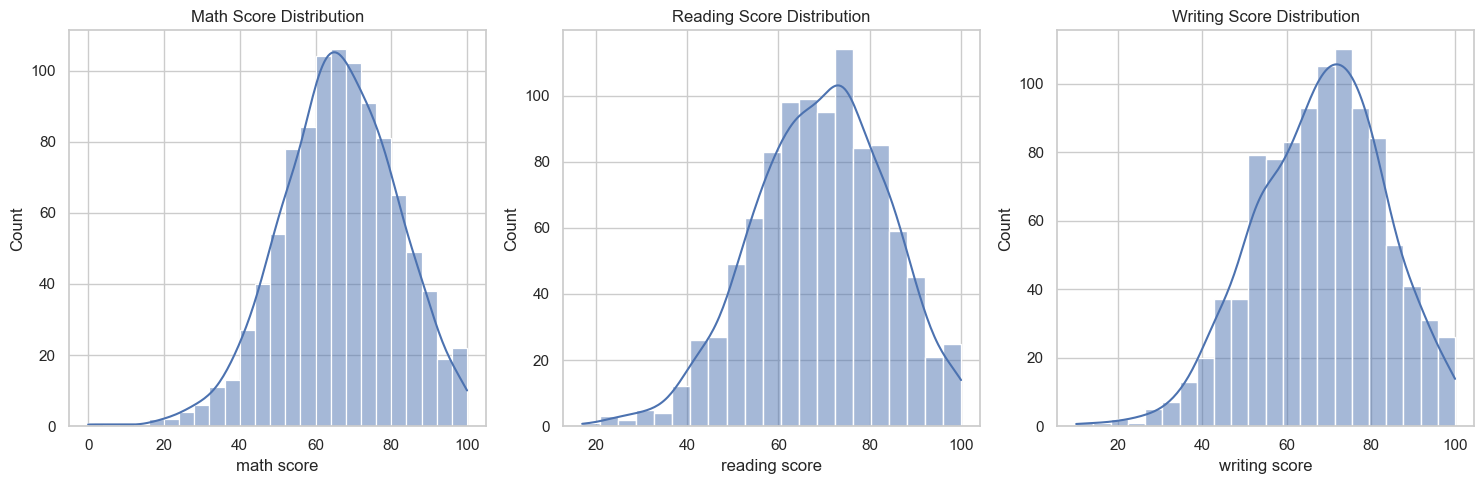

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['math score'], kde=True)
plt.title('Math Score Distribution')

plt.subplot(1,3,2)
sns.histplot(df['reading score'], kde=True)
plt.title('Reading Score Distribution')

plt.subplot(1,3,3)
sns.histplot(df['writing score'], kde=True)
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()


- Math scores show relatively higher variability compared to reading and writing.
- Reading and writing scores are more symmetrically distributed, indicating consistent performance.
- Overall, students tend to perform slightly better in reading and writing than in mathematics.


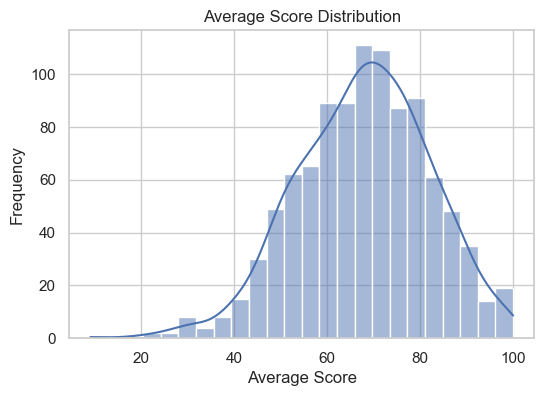

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['average_score'], kde=True)
plt.title('Average Score Distribution')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()


- The average score distribution is approximately normal.
- Most students cluster around the mid-range scores, indicating moderate overall academic performance.


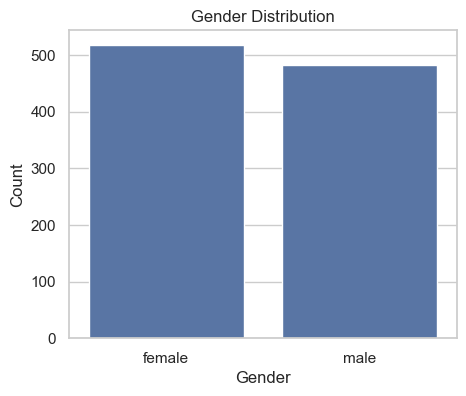

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


- The dataset contains a nearly balanced distribution of male and female students.
- This balance ensures fair comparative analysis between genders in later stages.


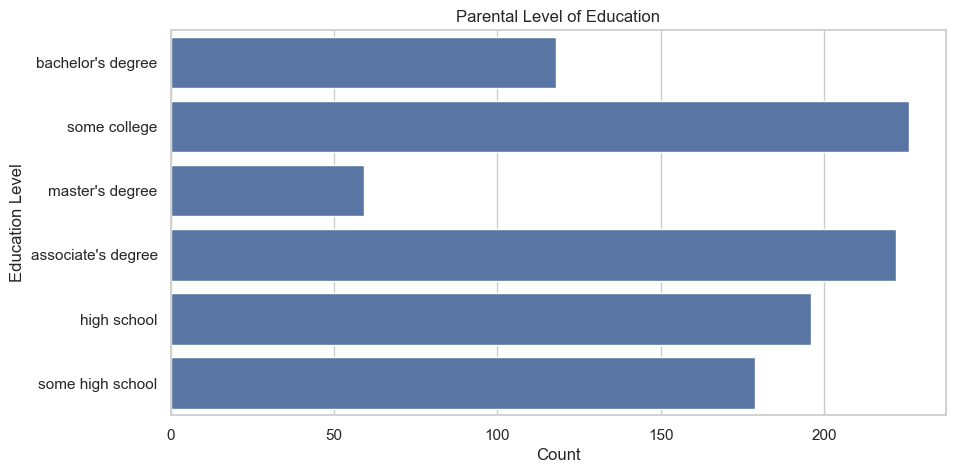

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(y='parental level of education', data=df)
plt.title('Parental Level of Education')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()


- Most parents have education levels ranging from some college to associate’s degree.
- Higher education levels are less frequent, which may influence academic support availability.


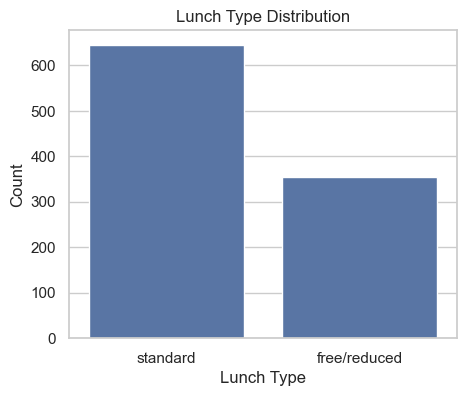

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(x='lunch', data=df)
plt.title('Lunch Type Distribution')
plt.xlabel('Lunch Type')
plt.ylabel('Count')
plt.show()


- A higher proportion of students receive standard lunch compared to free/reduced lunch.
- Lunch type may act as a proxy indicator for socio-economic status.


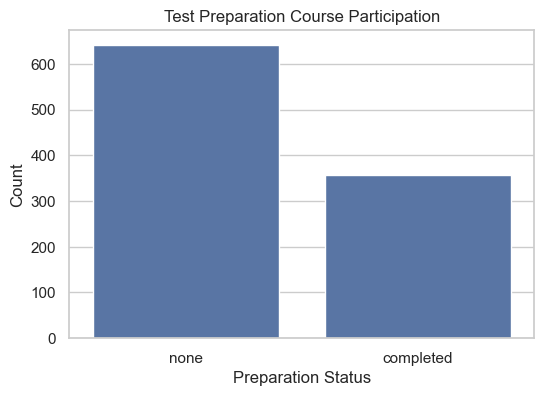

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='test preparation course', data=df)
plt.title('Test Preparation Course Participation')
plt.xlabel('Preparation Status')
plt.ylabel('Count')
plt.show()


- A significant number of students did not complete the test preparation course.
- This variable is expected to show a strong relationship with academic performance.


## Univariate Analysis Summary

- Student scores vary across subjects, with mathematics showing the highest variability.
- The dataset is demographically balanced in terms of gender.
- Parental education and socio-economic indicators show diverse distributions.
- Several categorical variables have the potential to influence student performance and will be analyzed further.


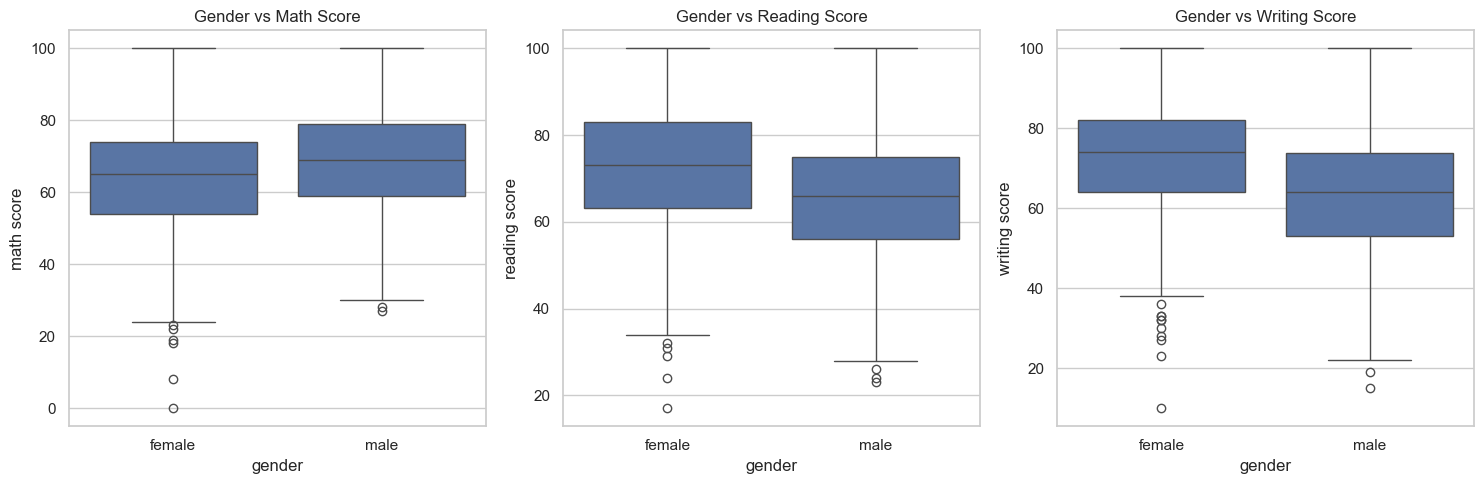

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Gender vs Math Score')

plt.subplot(1,3,2)
sns.boxplot(x='gender', y='reading score', data=df)
plt.title('Gender vs Reading Score')

plt.subplot(1,3,3)
sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Gender vs Writing Score')

plt.tight_layout()
plt.show()


- Female students tend to outperform male students in reading and writing scores.
- Male students show slightly higher median scores in mathematics.
- Gender-based performance differences vary by subject rather than overall ability.


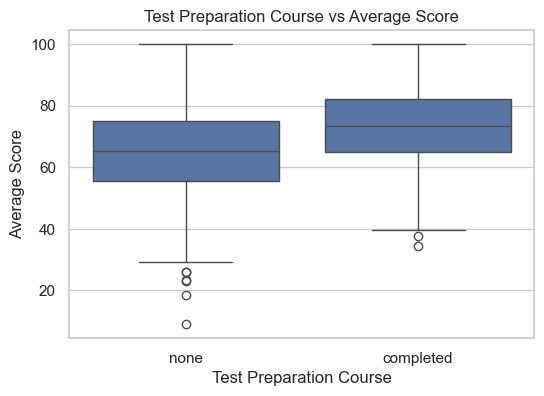

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.title('Test Preparation Course vs Average Score')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.show()


- Students who completed the test preparation course have significantly higher average scores.
- This indicates structured preparation has a strong positive impact on academic performance.


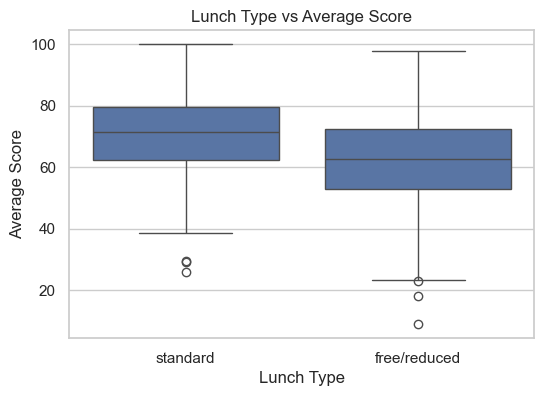

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x='lunch', y='average_score', data=df)
plt.title('Lunch Type vs Average Score')
plt.xlabel('Lunch Type')
plt.ylabel('Average Score')
plt.show()


- Students receiving standard lunch generally score higher than those with free/reduced lunch.
- Lunch type appears to correlate with socio-economic factors affecting performance.


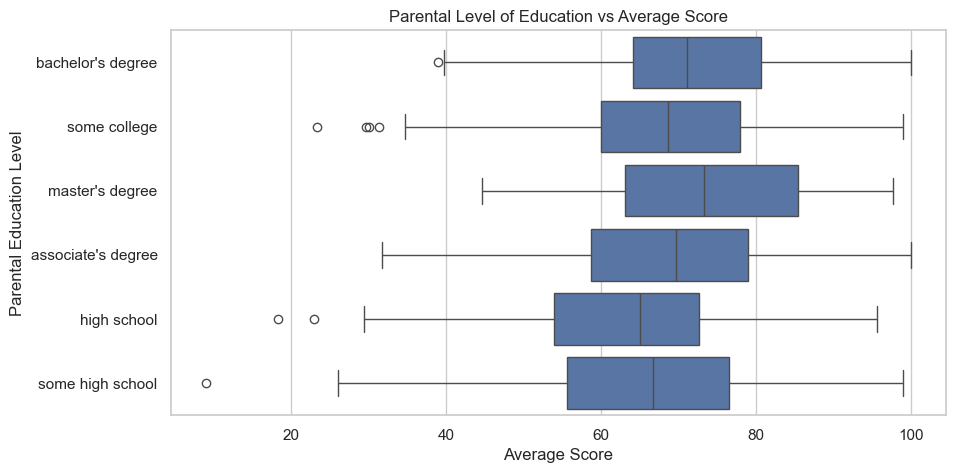

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(y='parental level of education', x='average_score', data=df)
plt.title('Parental Level of Education vs Average Score')
plt.xlabel('Average Score')
plt.ylabel('Parental Education Level')
plt.show()


- Higher parental education levels are associated with better student performance.
- Students whose parents have higher education levels tend to achieve higher average scores.


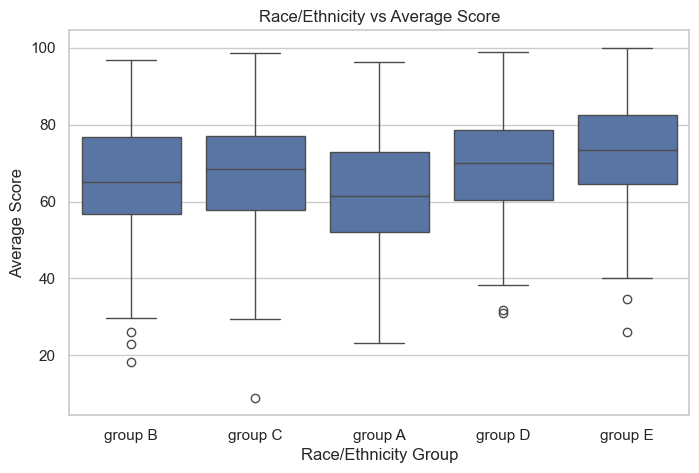

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='race/ethnicity', y='average_score', data=df)
plt.title('Race/Ethnicity vs Average Score')
plt.xlabel('Race/Ethnicity Group')
plt.ylabel('Average Score')
plt.show()


- Performance varies across different race/ethnicity groups.
- These differences may reflect underlying socio-economic and educational resource disparities.


## Bivariate Analysis Summary

- Academic performance is influenced by demographic, socio-economic, and behavioral factors.
- Test preparation courses show the strongest positive relationship with performance.
- Parental education and lunch type significantly correlate with student outcomes.
- Gender-based performance differences are subject-specific rather than overall.


In [26]:
numeric_df = df[['math score', 'reading score', 'writing score', 'average_score']]
numeric_df.corr()


,math score,reading score,writing score,average_score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
average_score,0.918746,0.970331,0.965667,1.000000


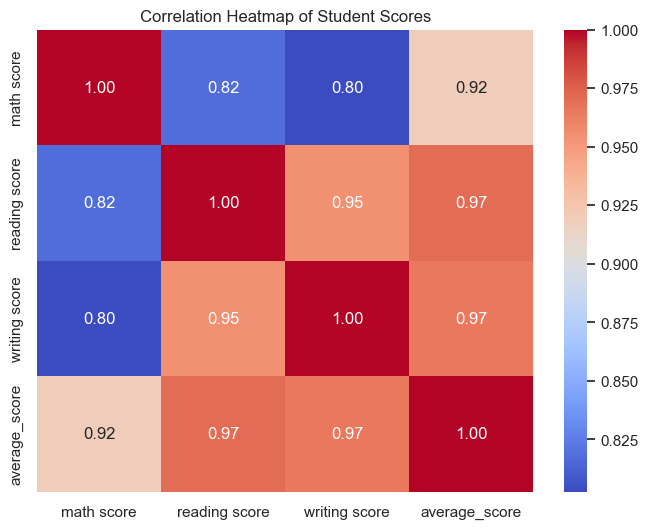

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Student Scores')
plt.show()


- Strong positive correlations exist between reading and writing scores.
- Average score is highly correlated with all individual subject scores.
- Mathematics shows slightly lower correlation with language-based subjects, indicating subject-specific skill differences.


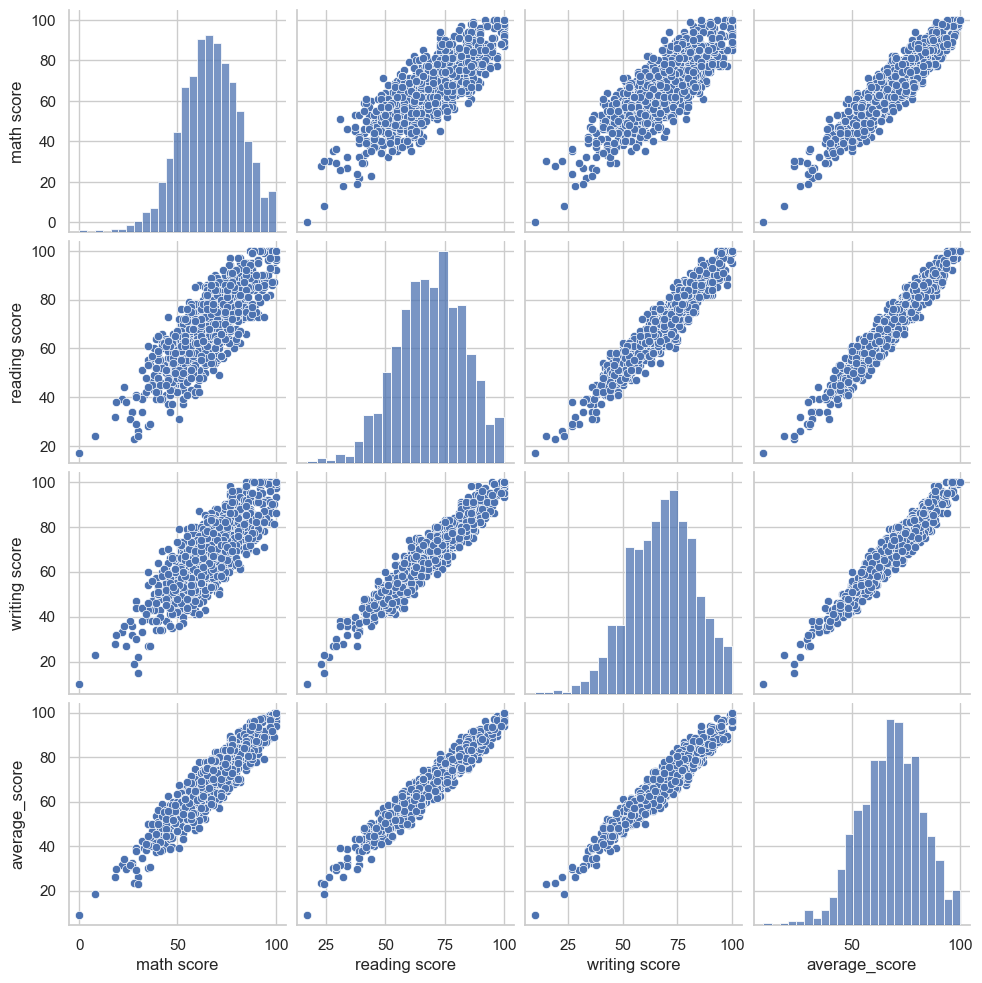

In [28]:
sns.pairplot(numeric_df)
plt.show()


- Linear relationships are observed among all score variables.
- Reading and writing scores exhibit the strongest linear association.
- No extreme outliers are evident, indicating data consistency.


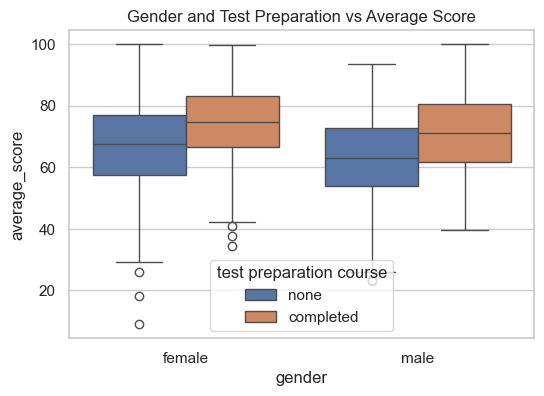

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='average_score', hue='test preparation course', data=df)
plt.title('Gender and Test Preparation vs Average Score')
plt.show()


- Test preparation consistently improves performance across both genders.
- Gender differences reduce significantly among students who completed test preparation.
- Structured academic support mitigates performance disparities.


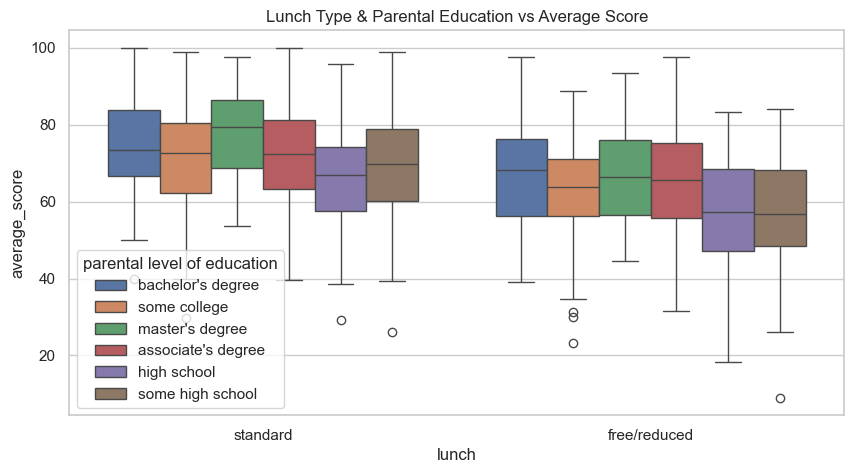

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='lunch', y='average_score', hue='parental level of education', data=df)
plt.title('Lunch Type & Parental Education vs Average Score')
plt.show()


- Students with standard lunch and higher parental education achieve the highest scores.
- Socio-economic factors and parental background jointly influence academic outcomes.


## Multivariate Analysis Summary

- Student performance is influenced by a combination of academic preparation, socio-economic status, and parental background.
- Test preparation emerges as the most impactful controllable factor.
- Strong correlations among subject scores suggest consistent academic ability patterns.
- Multivariate analysis confirms that targeted interventions can reduce performance gaps.


## Key Insights & Findings

1. **Subject-wise Performance Patterns**
   - Students generally perform better in reading and writing compared to mathematics.
   - Mathematics scores show higher variability, indicating uneven conceptual understanding.

2. **Impact of Test Preparation**
   - Test preparation course completion has a strong positive impact on academic performance.
   - Students who completed the course consistently scored higher across all subjects.

3. **Gender-Based Trends**
   - Female students outperform male students in reading and writing.
   - Male students show slightly better performance in mathematics.
   - Overall academic ability is comparable across genders, with subject-specific differences.

4. **Socio-Economic Influence**
   - Students receiving standard lunch perform better than those with free/reduced lunch.
   - Lunch type serves as an indicator of socio-economic background affecting outcomes.

5. **Parental Education Effect**
   - Higher parental education levels are associated with improved student performance.
   - Students whose parents hold higher degrees tend to achieve higher average scores.

6. **Correlation Between Subjects**
   - Strong positive correlations exist between reading and writing scores.
   - Average score is highly correlated with all individual subject scores, validating it as a holistic metric.

7. **Multivariate Relationships**
   - Test preparation reduces performance gaps across genders.
   - Combined effects of parental education and socio-economic status significantly influence academic success.


## Conclusion

This analysis explored multiple demographic, socio-economic, and academic factors influencing student performance. 
The findings indicate that while inherent differences exist across subjects and demographics, structured academic 
support such as test preparation courses plays a critical role in improving outcomes.

Socio-economic background and parental education significantly affect performance, highlighting the importance 
of targeted educational interventions. Overall, the analysis demonstrates that student performance is shaped by 
a combination of controllable and non-controllable factors, with preparation and support being key drivers of success.


## Future Scope

- Apply predictive modeling to forecast student performance using machine learning algorithms.
- Include attendance, study hours, and psychological factors for deeper analysis.
- Perform longitudinal studies to track performance trends over time.
- Use clustering techniques to group students based on learning patterns.
- Develop recommendation systems for personalized academic improvement plans.
